# **World Population Data Analysis**
**Sinclair Hansen & Professor Choraszewski**

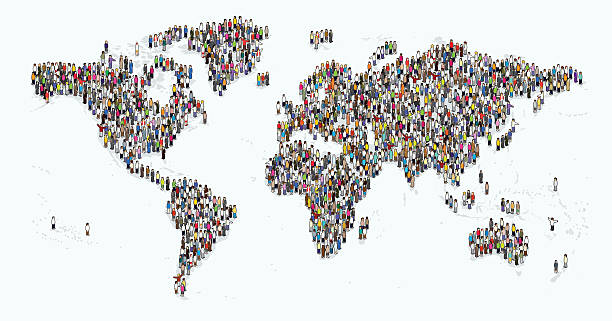
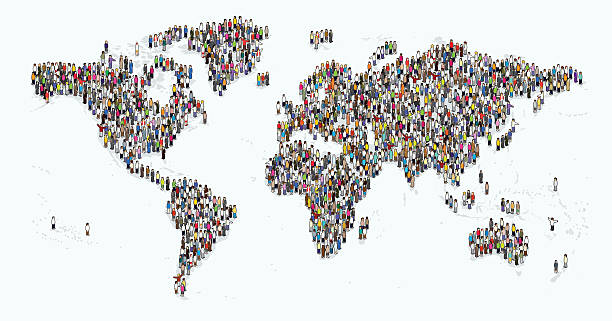

In November of 2022, the UN reported that the world population reached 8 billion people. Currently, the population stands at a solid 8.2 billion. Studying population is important to understanding our world's demographics, age, birth rate, impact on economy, etc. It can also assist in our projections on where our population will end up over the next several decades.

The primary dataset was retrieved from the World Population Review:
[https://worldpopulationreview.com/](http://)

I would like to note that this dataset acknowledges 234 nations worldwide. This number will change depending on which nation you reside in. The UN recognizes 193 nations. This dataset breaks some regions into smaller parts.


**Importing Proper Libraries**

In [39]:

# Loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

# Download latest version
path = kagglehub.dataset_download("sazidthe1/world-population-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-population-data


**Connecting to dataset**

In [40]:
pd.set_option('display.max_columns', None) # View all columns
pd.options.display.float_format = '{:.0f}'.format # Avoid Scientific notation while showing numbers

In [41]:
df = pd.read_csv('/kaggle/input/world-population-data/world_population_data.csv').drop_duplicates()
#df is our data and it is set to our file


**Going through some of the prevalent data**

In [42]:
df.describe().style.set_properties(**{"background-color": "#32a895", "color": "white", "border": "2 px solid black"}) 
#General stats about the various categories in the dataset

,rank,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²)
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,117.500000,34374424.743590,34074414.713675,33501070.952991,31729956.243590,29845235.042735,26269468.816239,22710220.790598,18984616.982906,15786908.807692,581449.983590,451.282051
std,67.694165,137386405.597263,136766424.804728,135589876.924439,130404992.751760,124218487.631581,111698206.719070,97832173.346751,81785186.081872,67795091.643236,1761840.665609,1979.398922
min,1.000000,518.000000,510.000000,520.000000,564.000000,596.000000,651.000000,700.000000,733.000000,752.000000,0.440000,0.000000
25%,59.250000,422598.250000,419738.500000,415284.500000,404676.000000,393149.000000,327242.000000,264115.750000,229614.250000,155997.000000,2650.000000,39.500000
50%,117.500000,5643895.000000,5559944.500000,5493074.500000,5307400.000000,4942770.500000,4292907.000000,3825409.500000,3141145.500000,2604830.000000,81199.500000,97.500000
75%,175.750000,23245367.250000,22476504.750000,21447979.500000,19730853.750000,19159567.500000,15762301.000000,11869231.000000,9826053.750000,8817329.000000,430425.750000,242.750000
max,234.000000,1428627663.000000,1425887337.000000,1424929781.000000,1393715448.000000,1348191368.000000,1264099069.000000,1153704252.000000,982372466.000000,822534450.000000,17098242.000000,21403.000000


In [43]:
df.head(10).style.set_properties(**{"background-color": "#32a895", "color": "white", "border": "2 px solid black"}) 
#This prints the top 10 highest population nations currently

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,1,IND,India,Asia,1428627663,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590.000000,481,0.81%,17.85%
1,2,CHN,China,Asia,1425671352,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961.000000,151,-0.02%,17.81%
2,3,USA,United States,North America,339996563,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610.000000,37,0.50%,4.25%
3,4,IDN,Indonesia,Asia,277534122,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569.000000,148,0.74%,3.47%
4,5,PAK,Pakistan,Asia,240485658,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912.000000,312,1.98%,3.00%
5,6,NGA,Nigeria,Africa,223804632,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768.000000,246,2.41%,2.80%
6,7,BRA,Brazil,South America,216422446,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767.000000,26,0.52%,2.70%
7,8,BGD,Bangladesh,Asia,172954319,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570.000000,1329,1.03%,2.16%
8,9,RUS,Russia,Europe,144444359,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242.000000,9,-0.19%,1.80%
9,10,MEX,Mexico,North America,128455567,127504125,125998302,120149897,112532401,97873442,81720428,67705186,50289306,1964375.000000,66,0.75%,1.60%


In [44]:

print("Shape: ")
df.shape #The shape shows that 
#there are 234 countries and 17 different categories to sort them

df.info() #Gives better explaination for the categories

Shape: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    ob

In [45]:
# Looking for duplicate values
print(f'There are {df.duplicated().sum()} duplicate values.')

There are 0 duplicate values.


In [46]:
# nunique() checks for all unique values in each of the 17 categories
df.nunique().to_frame().T #Other two functions are for styling choices

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
0,234,234,234,6,234,234,234,234,234,234,234,234,234,232,167,176,73


# Box Plot of Each Category

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'rank'),
  Text(2, 0, '2023 population'),
  Text(3, 0, '2022 population'),
  Text(4, 0, '2020 population'),
  Text(5, 0, '2015 population'),
  Text(6, 0, '2010 population'),
  Text(7, 0, '2000 population'),
  Text(8, 0, '1990 population'),
  Text(9, 0, '1980 population'),
  Text(10, 0, '1970 population'),
  Text(11, 0, 'area (km²)'),
  Text(12, 0, 'density (km²)')])

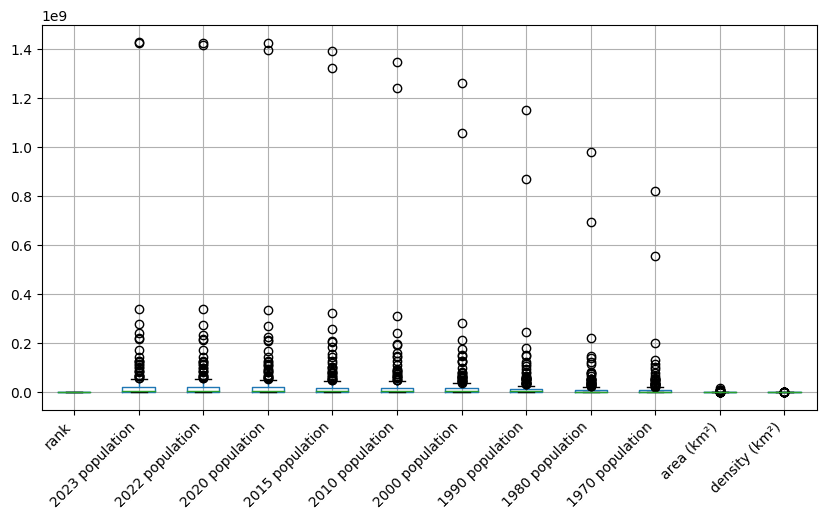

In [47]:
palette = "tab20c"
df.boxplot(figsize=(10,5))
plt.xticks(rotation=45, ha="right")

# **Creating First Population Maps**

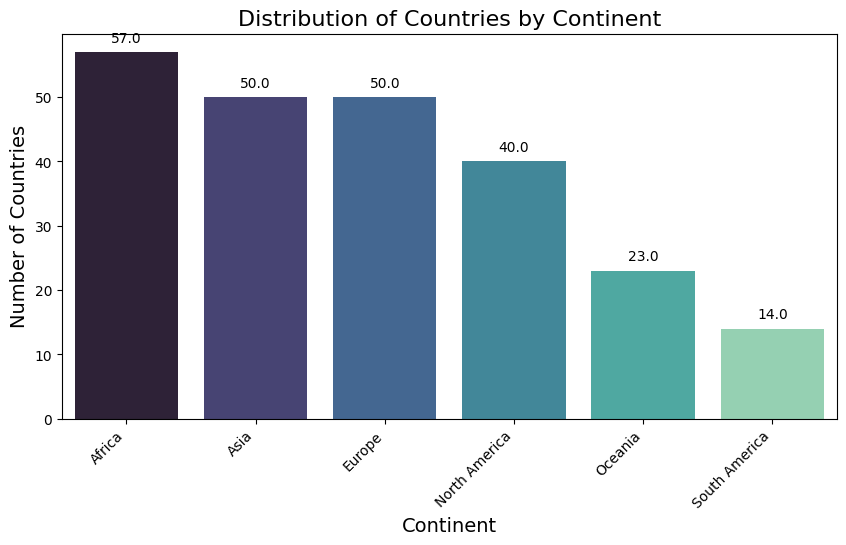

In [48]:
##Picking color for the map
palette = "mako"

plt.figure(figsize=(10,5))

ax = sns.countplot(x='continent', data=df, order=df['continent']
                   .value_counts().index, palette=palette)

# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Distribution of Countries by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()



**World Population in 2023**

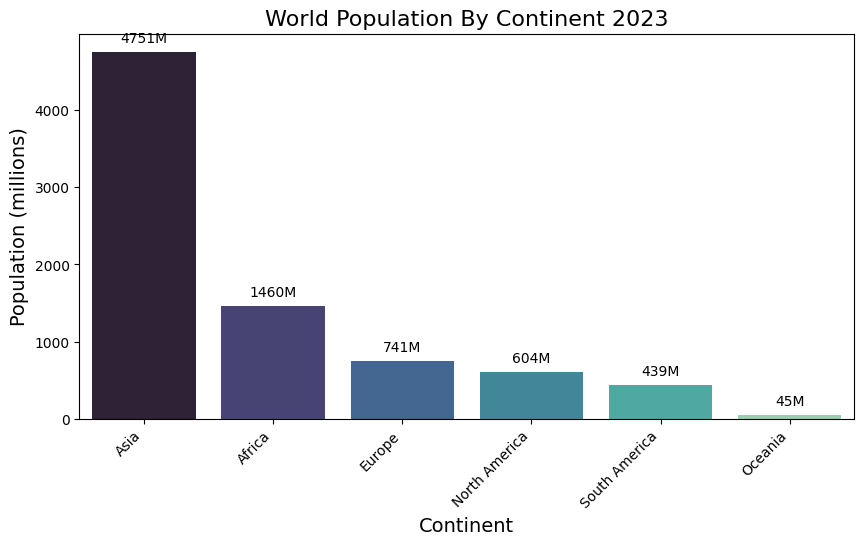

In [49]:
##Picking color for the map
palette = "mako"
contPopulation = df.groupby('continent')['2023 population'].sum() / 1e6

plt.figure(figsize=(10,5))

sorted_continents = contPopulation.sort_values(ascending=False).index


ax =sns.barplot(x=sorted_continents, y=contPopulation[sorted_continents], palette=palette)
# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('World Population By Continent 2023', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population (millions)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()



**World Population in 1990**

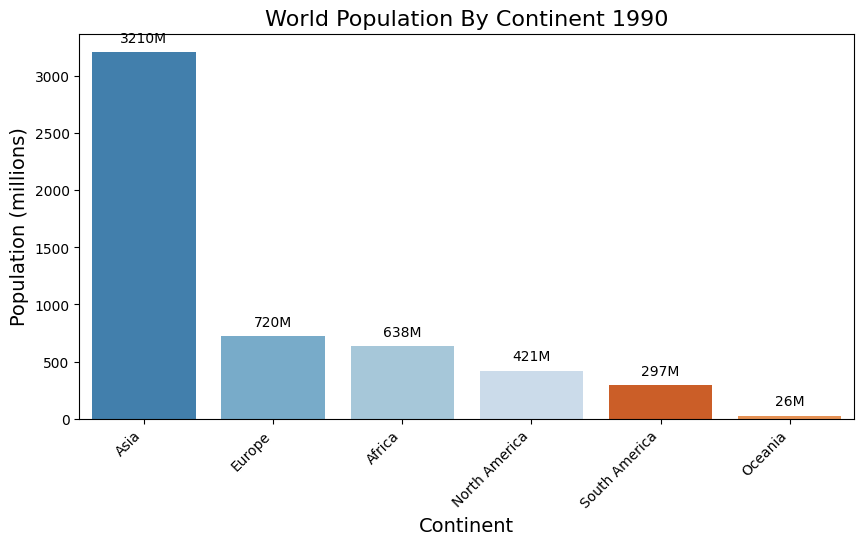

In [50]:

palette = "tab20c"
contPopulation = df.groupby('continent')['1990 population'].sum() / 1e6

plt.figure(figsize=(10,5))

sorted_continents = contPopulation.sort_values(ascending=False).index


ax =sns.barplot(x=sorted_continents, y=contPopulation[sorted_continents], palette=palette)
# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('World Population By Continent 1990', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population (millions)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()


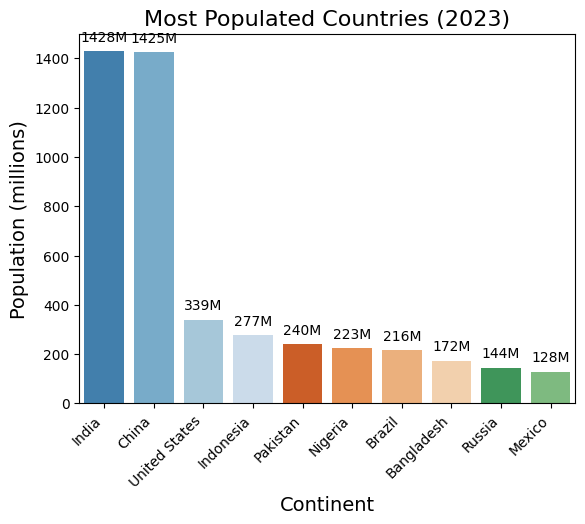

In [51]:
df['2023 population (millions)'] = df['2023 population'] / 1e6 # Makes population per million

df_sorted = df.sort_values(by = '2023 population (millions)', ascending = False)

topPopulations = df_sorted.head(10)

ax =sns.barplot(x='country', y='2023 population (millions)',data = topPopulations, palette=palette)
# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Most Populated Countries (2023)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population (millions)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()




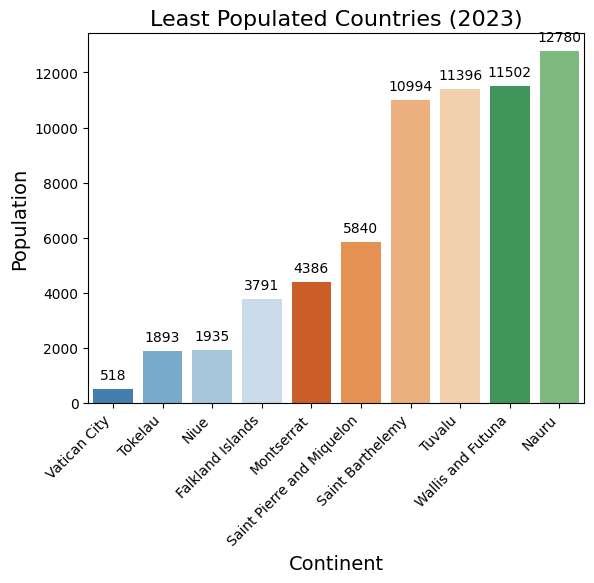

In [52]:
df_sorted = df.sort_values(by = '2023 population', ascending = True)

topPopulations = df_sorted.head(10)

ax =sns.barplot(x='country', y='2023 population',data = topPopulations, palette=palette)
# Display values on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and labels
plt.title('Least Populated Countries (2023)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Remove grid lines
ax.yaxis.grid(False)

# Show the plot
plt.show()

# Map of World Population in 2023

In [74]:

## Importing Libraries for maps
import requests
import folium

#Data for maps
geojson_url = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
response = requests.get(geojson_url)
geojson = response.json()

M = folium.Map(location=[20, 10], zoom_start=2)

INDICATOR = '2023 population'

folium.Choropleth(
    geo_data=geojson,
    data=df,
    columns=['cca3', '2023 population'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=INDICATOR
).add_to(M)

M

# Countries by area (km²)

In [86]:
M = folium.Map(location=[20, 10], zoom_start=2)

INDICATOR = 'density (km²)'

folium.Choropleth(
    geo_data=geojson,
    data=df,
    columns=['cca3', 'area (km²)'],
    key_on='feature.id',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=INDICATOR
).add_to(M)

M

In [54]:
world_population = df.nlargest(5, '2023 population') ##Getting top populations
world_population = world_population.set_index('country').iloc[:, 3:12].transpose()
##Takes all the years since 1970
world_population  

country,India,China,United States,Indonesia,Pakistan
2023 population,1428627663,1425671352,339996563,277534122,240485658
2022 population,1417173173,1425887337,338289857,275501339,235824862
2020 population,1396387127,1424929781,335942003,271857970,227196741
2015 population,1322866505,1393715448,324607776,259091970,210969298
2010 population,1240613620,1348191368,311182845,244016173,194454498
2000 population,1059633675,1264099069,282398554,214072421,154369924
1990 population,870452165,1153704252,248083732,182159874,115414069
1980 population,696828385,982372466,223140018,148177096,80624057
1970 population,557501301,822534450,200328340,115228394,59290872


# World Population Over Time

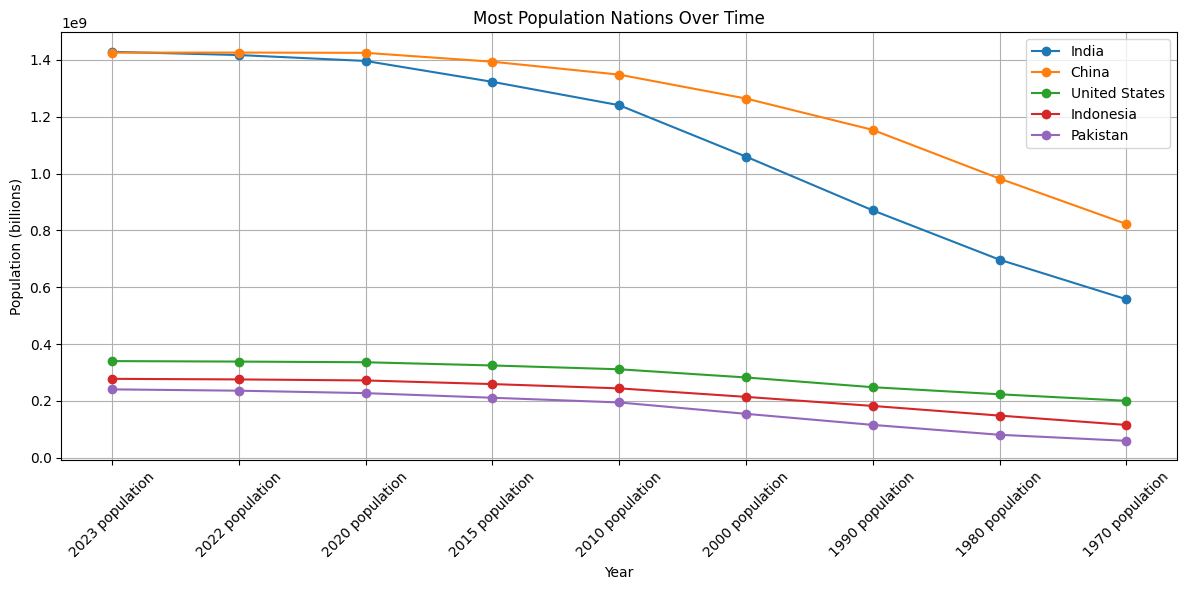

In [55]:
plt.figure(figsize=(12,6))
for country in world_population.columns:
    plt.plot(world_population.index, world_population[country], marker='o', label=country)

plt.title('Most Population Nations Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This graph displays the populations of the top 5 most populous nations since 1970. The years on the graph descend. 

# Let's Look at India

India is currently the most populated country in the world. As of 2023, India has clocked in a population of 1,428,627,663 people. This is over one-eighth of the total world population.

In [56]:
# Grabbing only India's data
years = ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022', '2023']
yearly_population = [557501301,696828385, 870452165,1059633675,1240613620,1322866505,1396387127,1417173173,1428627663]

india_population = df.nlargest(1, '2023 population') ##Getting India population
india_population = india_population.set_index('country').iloc[:, 3:12].transpose()
##Takes all the years since 1970
india_population

country,India
2023 population,1428627663
2022 population,1417173173
2020 population,1396387127
2015 population,1322866505
2010 population,1240613620
2000 population,1059633675
1990 population,870452165
1980 population,696828385
1970 population,557501301


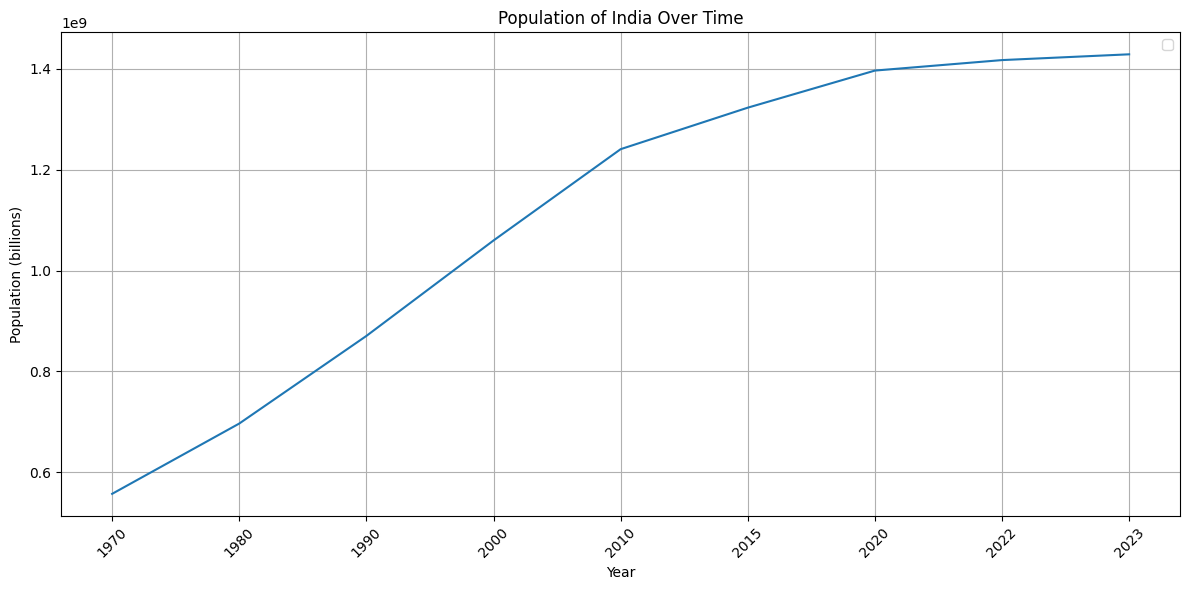

In [57]:
plt.figure(figsize=(12,6))
plt.plot(years, yearly_population)

plt.title('Population of India Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This line plot shows the growth of India's population since 1970. 

The graph below shows India's GDP since 1987 and it predicts the growth until 2029. 

Source to graph: [https://www.statista.com/statistics/263771/gross-domestic-product-gdp-in-india/](http://)

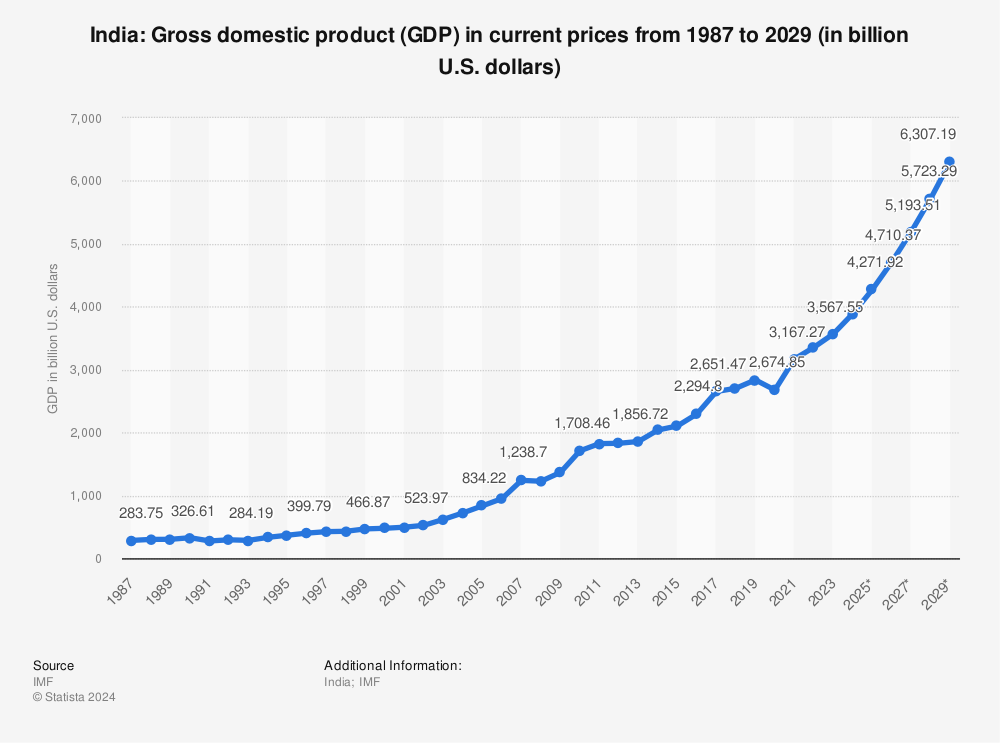
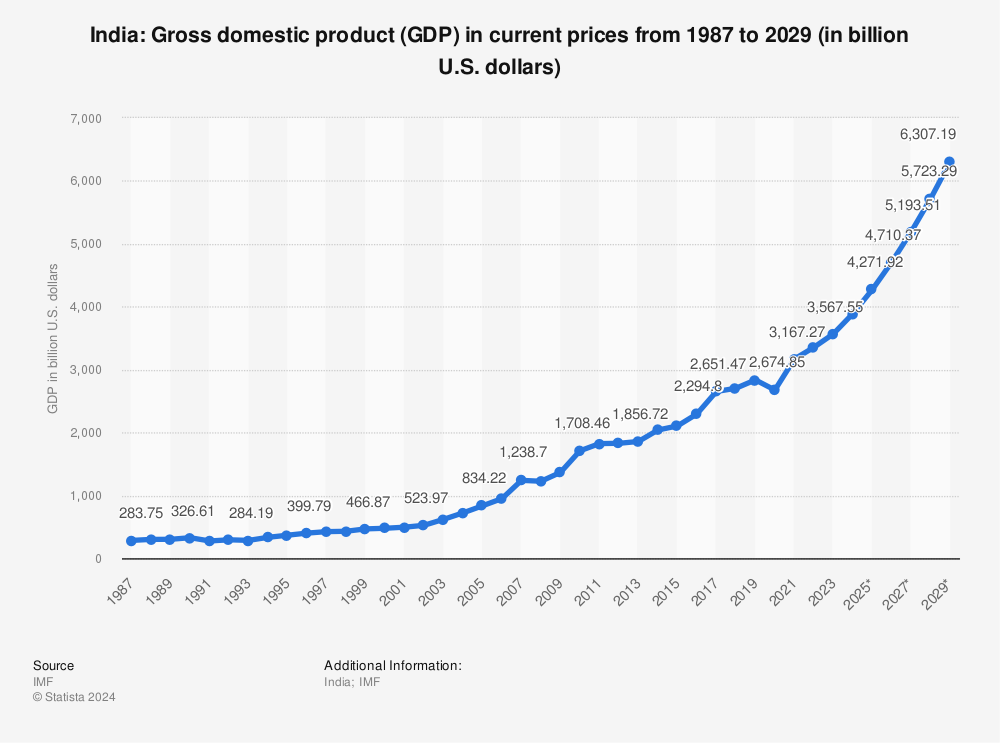

# How does India compare to a country declining in population?

Here we are going to take a look at Japan's population growth. Japan is one of the first countries to hit a stage 5 on the demographic transition model, meaning that the nation is now decreasing in population. According to the World Bank, Japan has a birth rate of 1.26. This is well below the rate of replacement (slightly higher than 2).

In [96]:
# Grabbing only Japan's data
years = ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022', '2023']
japan_population = [105416839,117624196, 123686321,126803861,128105431,127250933,125244761,123951692,123294513]

world_population = df.nlargest(12, '2023 population') ##Getting Jndia population
world_population = world_population.set_index('country').iloc[:, 3:12].transpose()
##Takes all the years since 1970
world_population

country,India,China,United States,Indonesia,Pakistan,Nigeria,Brazil,Bangladesh,Russia,Mexico,Ethiopia,Japan
2023 population,1428627663,1425671352,339996563,277534122,240485658,223804632,216422446,172954319,144444359,128455567,126527060,123294513
2022 population,1417173173,1425887337,338289857,275501339,235824862,218541212,215313498,171186372,144713314,127504125,123379924,123951692
2020 population,1396387127,1424929781,335942003,271857970,227196741,208327405,213196304,167420951,145617329,125998302,117190911,125244761
2015 population,1322866505,1393715448,324607776,259091970,210969298,183995785,205188205,157830000,144668389,120149897,102471895,127250933
2010 population,1240613620,1348191368,311182845,244016173,194454498,160952853,196353492,148391139,143242599,112532401,89237791,128105431
2000 population,1059633675,1264099069,282398554,214072421,154369924,122851984,175873720,129193327,146844839,97873442,67031867,126803861
1990 population,870452165,1153704252,248083732,182159874,115414069,95214257,150706446,107147651,148005704,81720428,47878073,123686321
1980 population,696828385,982372466,223140018,148177096,80624057,72951439,122288383,83929765,138257420,67705186,34945469,117624196
1970 population,557501301,822534450,200328340,115228394,59290872,55569264,96369875,67541860,130093010,50289306,28308246,105416839


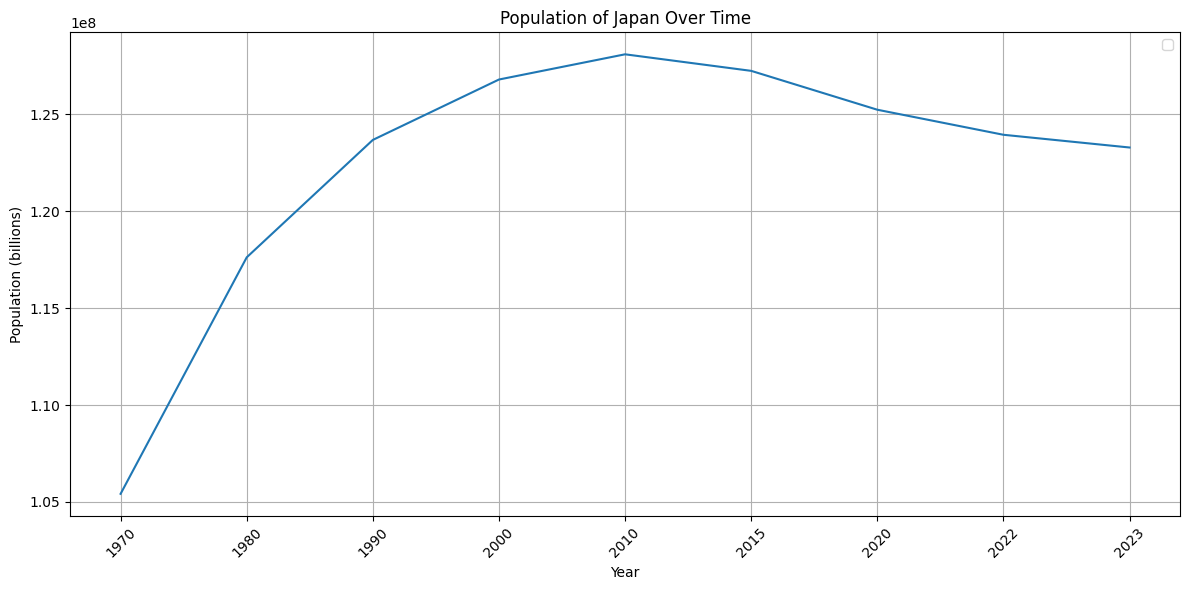

In [99]:
plt.figure(figsize=(12,6))
plt.plot(years, japan_population)

plt.title('Population of Japan Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Japan's GDP Over Time

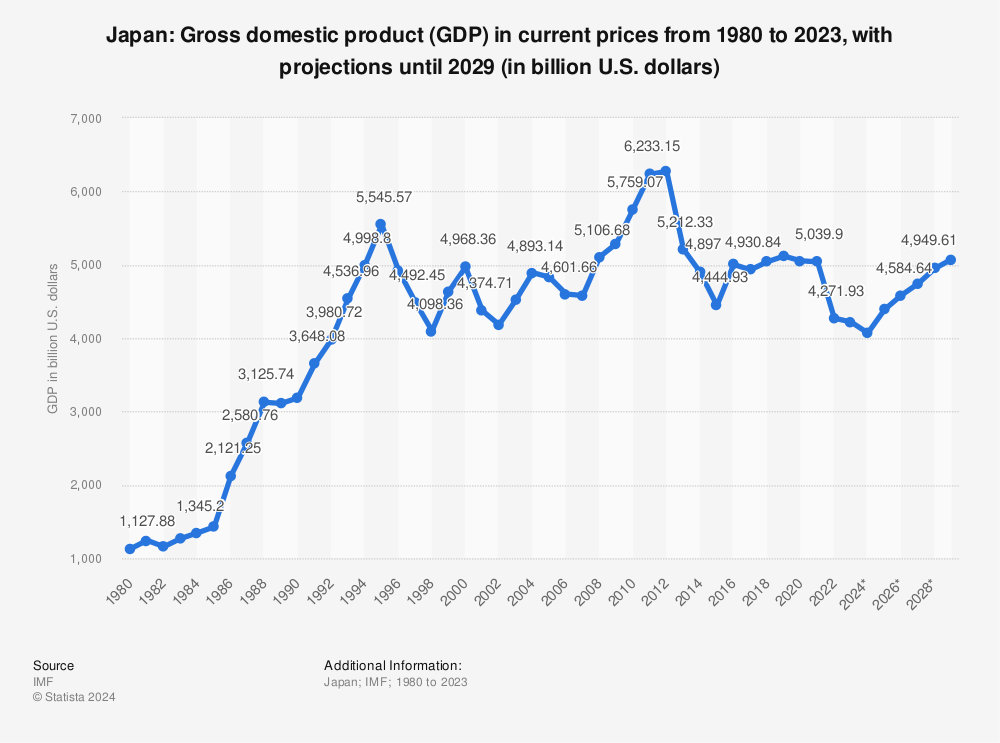!
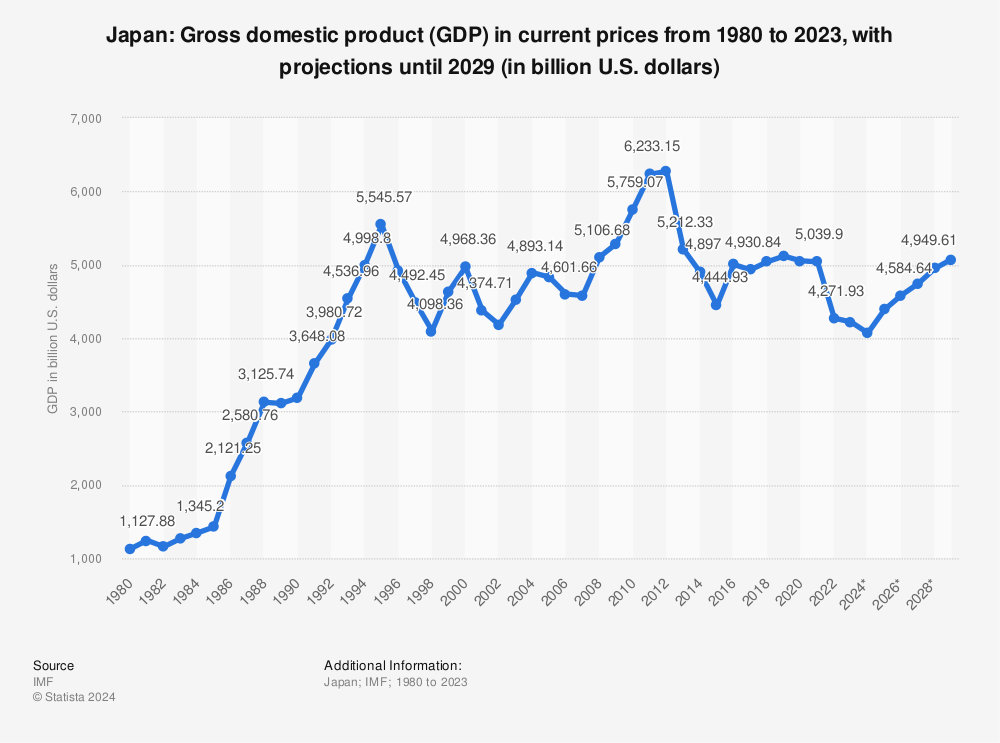

# Japan vs. India Popoulation Pyramid

This data is supported by Japan's population pyramid shown below. The majority of the population is middle-aged or elderly, showing that the replacement rate is not high enough. 

The second population pyramid is from India. Majority of the population is below the age of 40. A very small percentage of the country is above the age of 55. This shows a rapid increase in population over the next several years as the replacement rate of India is 2.1 children per woman.


Source: [https://www.cia.gov/the-world-factbook/about/archives/2021/](http://)

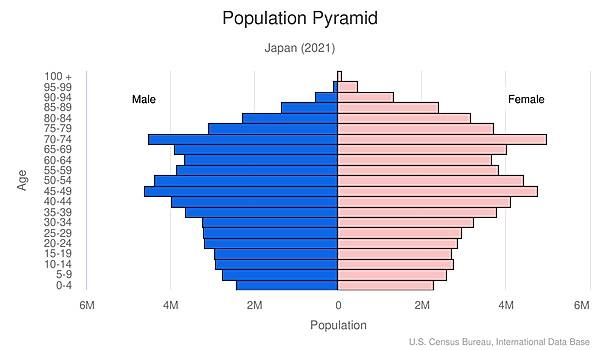!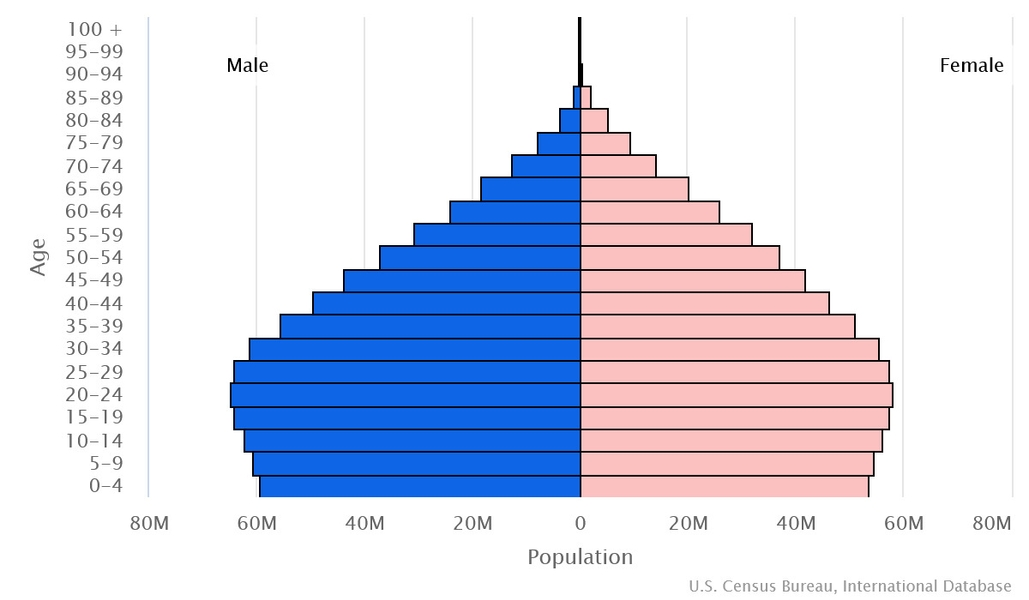!
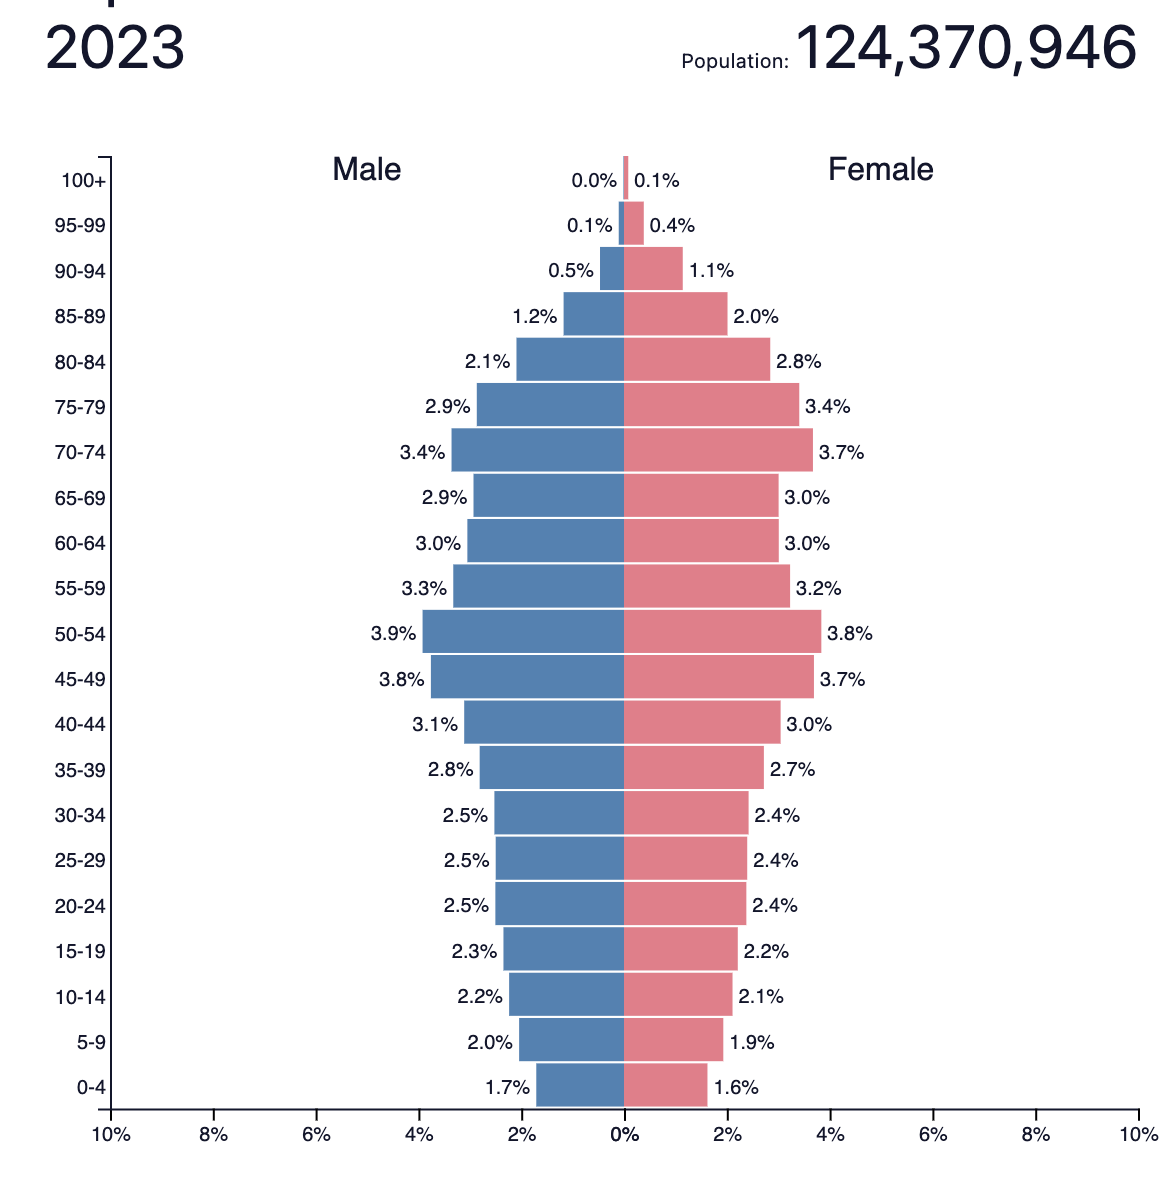
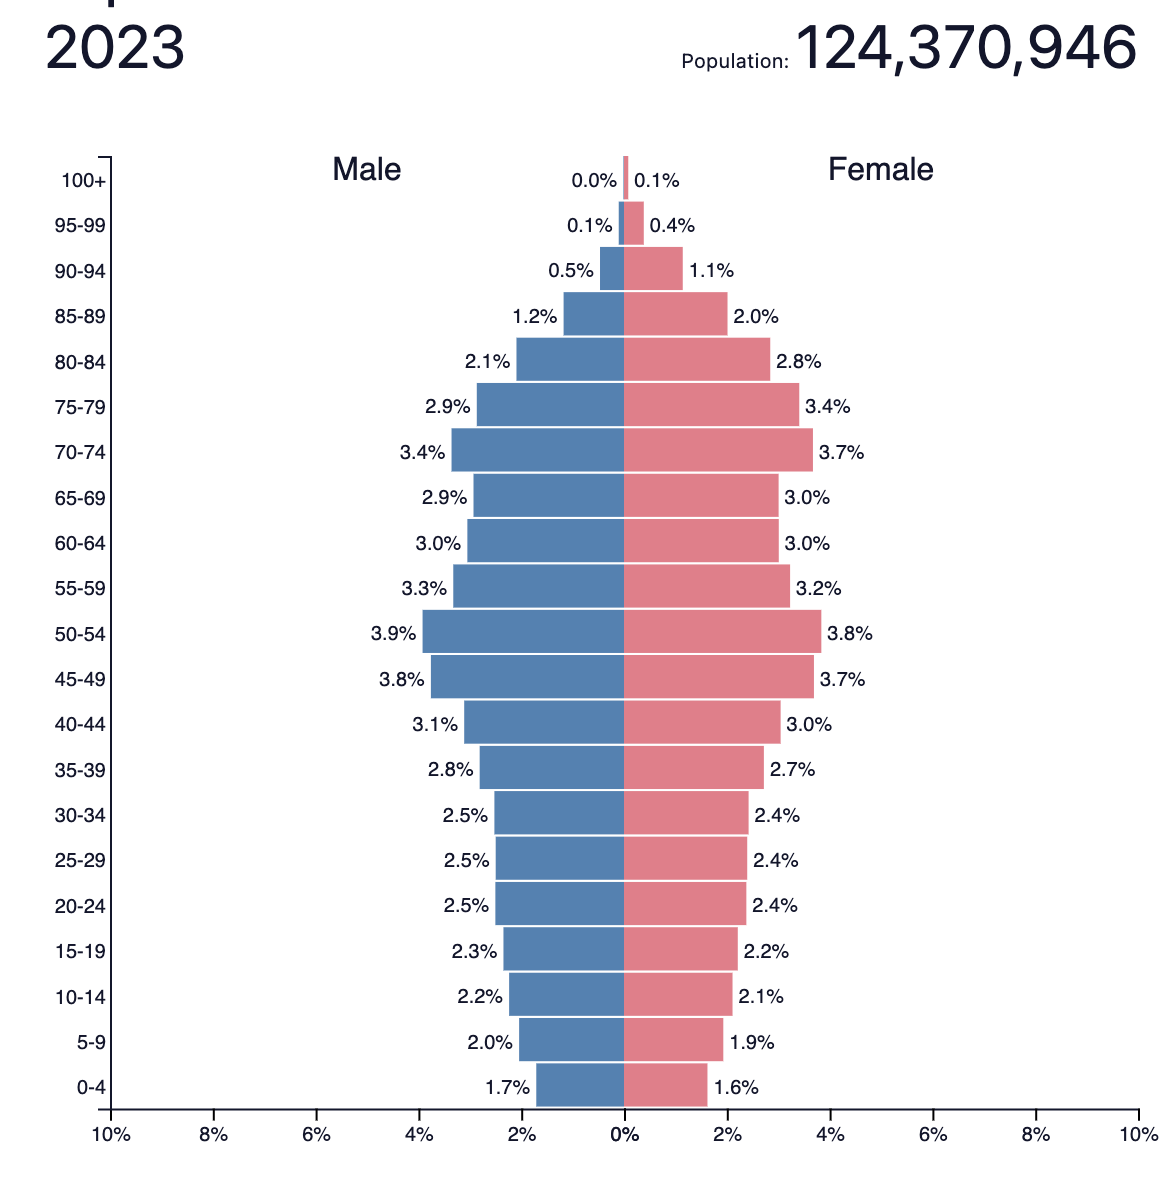
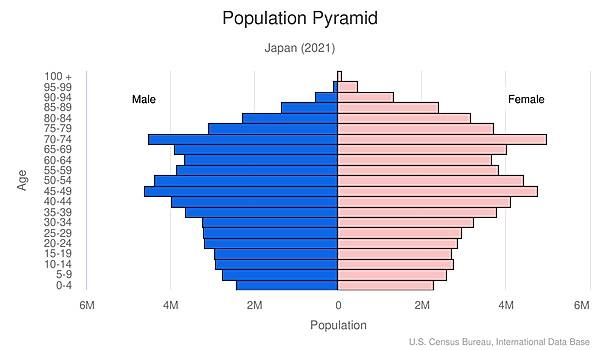
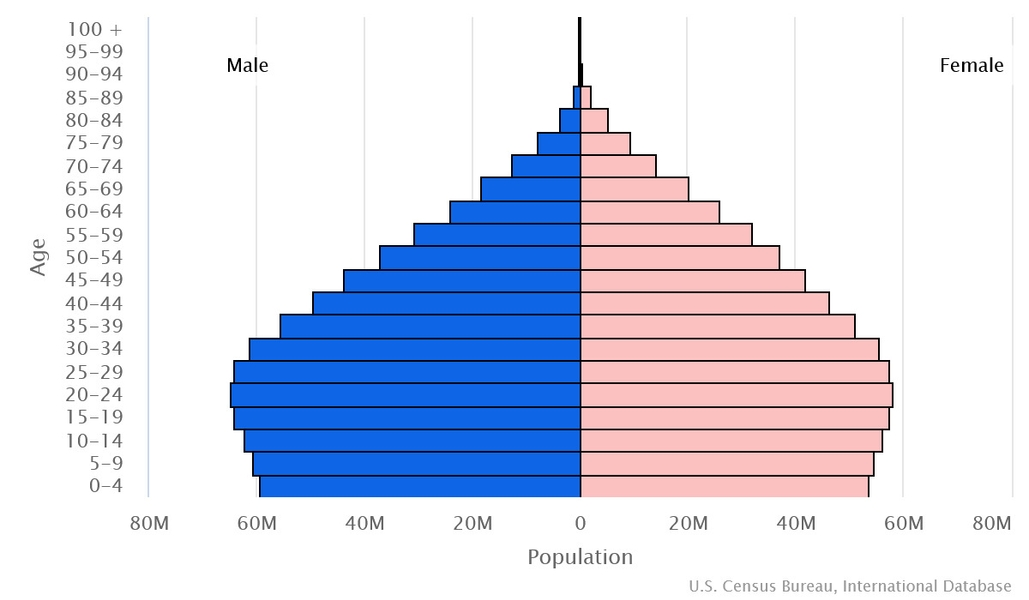

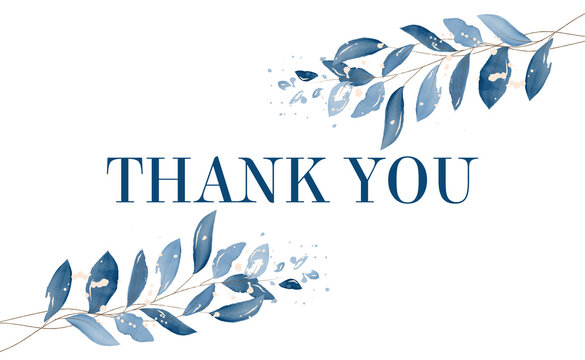!
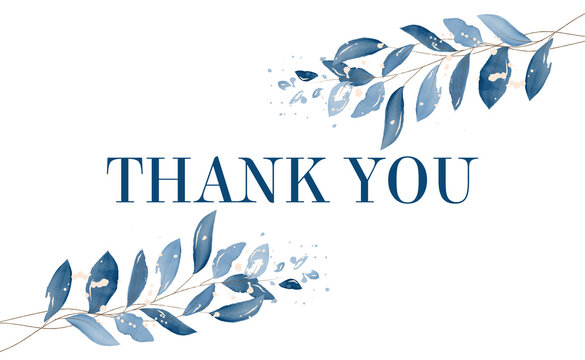